# Integration of D30 TSC and EXMC, naive and primed cells with monkey embryo datasets (Yang et al., Tan et al.)

In [1]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed")

## Libraries

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
set.seed(1234)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”


In [3]:
suppressMessages(library(Matrix))

In [4]:
suppressMessages(library(dplyr))
#suppressMessages(library(tidyverse))

In [5]:
library(tibble)
#library(wesanderson)

Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [6]:
library(viridis)

Loading required package: viridisLite



In [7]:
library(tidyr)


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [8]:
library(RColorBrewer)

In [9]:
library(plotly)

Warning message:
“package ‘plotly’ was built under R version 4.1.1”

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [10]:
library(xlsx)

In [11]:
library(AUCell)

In [12]:
suppressMessages(library(GSEABase))

In [13]:
library(pals)


Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis




In [14]:
Colourblind_palette <- c( "#E69F00" , "#56B4E9" , "#009E73" , "#F0E442" , "#0072B2" , "#D55E00" , "#CC79A7" , "#000000" )

In [15]:
#n <- 60
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [16]:
col_vector

[1] "#7FC97F" "#BEAED4" "#FDC086" "#FFFF99" "#386CB0" "#F0027F" "#BF5B17"
 [8] "#666666" "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02"
[15] "#A6761D" "#666666" "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99"
[22] "#E31A1C" "#FDBF6F" "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"
[29] "#FBB4AE" "#B3CDE3" "#CCEBC5" "#DECBE4" "#FED9A6" "#FFFFCC" "#E5D8BD"
[36] "#FDDAEC" "#F2F2F2" "#B3E2CD" "#FDCDAC" "#CBD5E8" "#F4CAE4" "#E6F5C9"
[43] "#FFF2AE" "#F1E2CC" "#CCCCCC" "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3"
[50] "#FF7F00" "#FFFF33" "#A65628" "#F781BF" "#999999" "#66C2A5" "#FC8D62"
[57] "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494" "#B3B3B3" "#8DD3C7"
[64] "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69" "#FCCDE5"
[71] "#D9D9D9" "#BC80BD" "#CCEBC5" "#FFED6F"

In [32]:
Yang_Tan_mk_VPD30_annotation<- read.csv( "Yang_Tan_mk_VPD30_annotation.csv", row.names = 1)

In [33]:
head(Yang_Tan_mk_VPD30_annotation)

,orig.ident,nCount_RNA,nFeature_RNA,cell_name,Experiment,finalClusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
AAAGAACCAACAGAGC.1,Mk_D30,50804,7902,AAAGAACCAACAGAGC.1,VP,"Pham, Panda Primed"
AAAGAACGTAGCCCTG.1,Mk_D30,55443,7953,AAAGAACGTAGCCCTG.1,VP,"Pham, Panda Primed"
AAAGGATAGCTCGAAG.1,Mk_D30,35159,6107,AAAGGATAGCTCGAAG.1,VP,"Pham, Panda TSC"
AAAGGATCACAAATGA.1,Mk_D30,23777,6107,AAAGGATCACAAATGA.1,VP,"Pham, Panda Primed"
AAAGGTATCGGAACTT.1,Mk_D30,15220,3848,AAAGGTATCGGAACTT.1,VP,"Pham, Panda EXMC"
AAAGTCCAGAGAGAAC.1,Mk_D30,46068,7552,AAAGTCCAGAGAGAAC.1,VP,"Pham, Panda Primed"


In [35]:
Yang_Tan_mk_VPD30_mtx<-read.csv("Yang_Tan_mk_VPD30_mtx.csv", row.names = 1)

In [36]:
head(Yang_Tan_mk_VPD30_mtx)

,AAAGAACCAACAGAGC.1,AAAGAACGTAGCCCTG.1,AAAGGATAGCTCGAAG.1,AAAGGATCACAAATGA.1,AAAGGTATCGGAACTT.1,AAAGTCCAGAGAGAAC.1,AAAGTCCAGCGCTGCT.1,AACAGGGGTACGAAAT.1,AACCACAAGTTACGGG.1,AACCACACATCGATGT.1,⋯,WT_d12_b2_TTTACGTTCGTGACTA,WT_d12_b2_TTTAGTCCAGCTTTGA,WT_d12_b2_TTTATGCTCACCGACG,WT_d12_b2_TTTCATGTCCACAGCG,WT_d12_b2_TTTCCTCAGCTAGATA,WT_d12_b2_TTTCGATTCGGACGTC,WT_d12_b2_TTTGACTGTATCGAAA,WT_d12_b2_TTTGATCCACATACTG,WT_d12_b2_TTTGGAGAGTCATGGG,WT_d12_b2_TTTGGAGCATGGGATG
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
DDX11L1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
WASH7P,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MIR6859-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OR4G4P,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OR4G11P,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Creat seurat object

In [44]:
so_Mon_hum<- CreateSeuratObject(counts = Yang_Tan_mk_VPD30_mtx, project = "MonkeyHumanEmbryos", min.cells = 0, min.features = 00)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [45]:
so_Mon_hum@meta.data<- Yang_Tan_mk_VPD30_annotation

In [46]:
head(so_Mon_hum@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Day,Day_v2,cell_name,Experiment,Cell.type,lineage
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
D10_IVC4_E1_B1_10,Tyser_VP_Messmer_Petropoulos_Zhou,788590,10072,D10,D10,D10_IVC4_E1_B1_10,Zhou,post_implantation,TB.medium2
D10_IVC4_E1_B1_11,Tyser_VP_Messmer_Petropoulos_Zhou,46029,3923,D10,D10,D10_IVC4_E1_B1_11,Zhou,post_implantation,unknown
D10_IVC4_E1_B1_12,Tyser_VP_Messmer_Petropoulos_Zhou,146063,7508,D10,D10,D10_IVC4_E1_B1_12,Zhou,post_implantation,TB.late
D10_IVC4_E1_B1_13,Tyser_VP_Messmer_Petropoulos_Zhou,1262641,10042,D10,D10,D10_IVC4_E1_B1_13,Zhou,post_implantation,Pre.ST
D10_IVC4_E1_B1_14,Tyser_VP_Messmer_Petropoulos_Zhou,24702,3347,D10,D10,D10_IVC4_E1_B1_14,Zhou,post_implantation,unknown
D10_IVC4_E1_B1_15,Tyser_VP_Messmer_Petropoulos_Zhou,2358380,12107,D10,D10,D10_IVC4_E1_B1_15,Zhou,post_implantation,TB.late


## Integrate VP scRNA-seq with monkey data Lanner and Tan

In [148]:
# split the dataset into a list of 8 seurat objects
so_Mon_hum.list <- SplitObject(so_Mon_hum, split.by = "Experiment")

In [149]:
so_Mon_hum.list

$Zhou
An object of class Seurat 
77133 features across 5895 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Messmer
An object of class Seurat 
77133 features across 905 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Pet
An object of class Seurat 
77133 features across 1526 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$VP
An object of class Seurat 
77133 features across 629 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Tyser
An object of class Seurat 
77133 features across 1195 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Tan_Hm
An object of class Seurat 
77133 

In [ ]:
so_Mon_hum.list[6]

In [150]:
so_VP_mk_LT.list<- so_Mon_hum.list[c(4,6,7,8)]

In [151]:
so_VP_mk_LT.list

$VP
An object of class Seurat 
77133 features across 629 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Tan_Hm
An object of class Seurat 
77133 features across 200 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Tan_MK
An object of class Seurat 
77133 features across 272 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

$Lanner
An object of class Seurat 
77133 features across 7193 samples within 1 assay 
Active assay: RNA (77133 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap


In [152]:
## Tan_Hm and Tan_ML count matrix were already normalised 
for (i in c(1,4)){
so_VP_mk_LT.list[[i]]<- NormalizeData(so_VP_mk_LT.list[[i]], verbose =FALSE)
}
so_VP_mk_LT.list[[2]]<- so_VP_mk_LT.list[[2]]
so_VP_mk_LT.list[[3]]<- so_VP_mk_LT.list[[3]]

In [153]:
#identify variable features for each dataset independently
so_VP_mk_LT.list <- lapply(X = so_VP_mk_LT.list, FUN = function(x) {
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = so_VP_mk_LT.list)

In [154]:
so_VP_mk_LT.anchors <- FindIntegrationAnchors(object.list = so_VP_mk_LT.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 980 anchors

Filtering anchors

	Retained 980 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1229 anchors

Filtering anchors

	Retained 1064 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 849 anchors

Filtering anchors

	Retained 775 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3015 anchors

Filtering anchors

	Retained 560 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1000 anchors

Filtering anchors

	Retained 47 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1326 anchors

Filtering anchors

	Retained 894 anchors



In [155]:
# this command creates an 'integrated' data assay
so_VP_mk_LT.combined <- IntegrateData(anchorset = so_VP_mk_LT.anchors)

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 1 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 2 3 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [156]:
# specify that we will perform downstream analysis on the corrected data note that the
# original unmodified data still resides in the 'RNA' assay
DefaultAssay(so_VP_mk_LT.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
so_VP_mk_LT.combined <- ScaleData(so_VP_mk_LT.combined, verbose = FALSE)
so_VP_mk_LT.combined <- RunPCA(so_VP_mk_LT.combined, npcs = 30, verbose = FALSE)

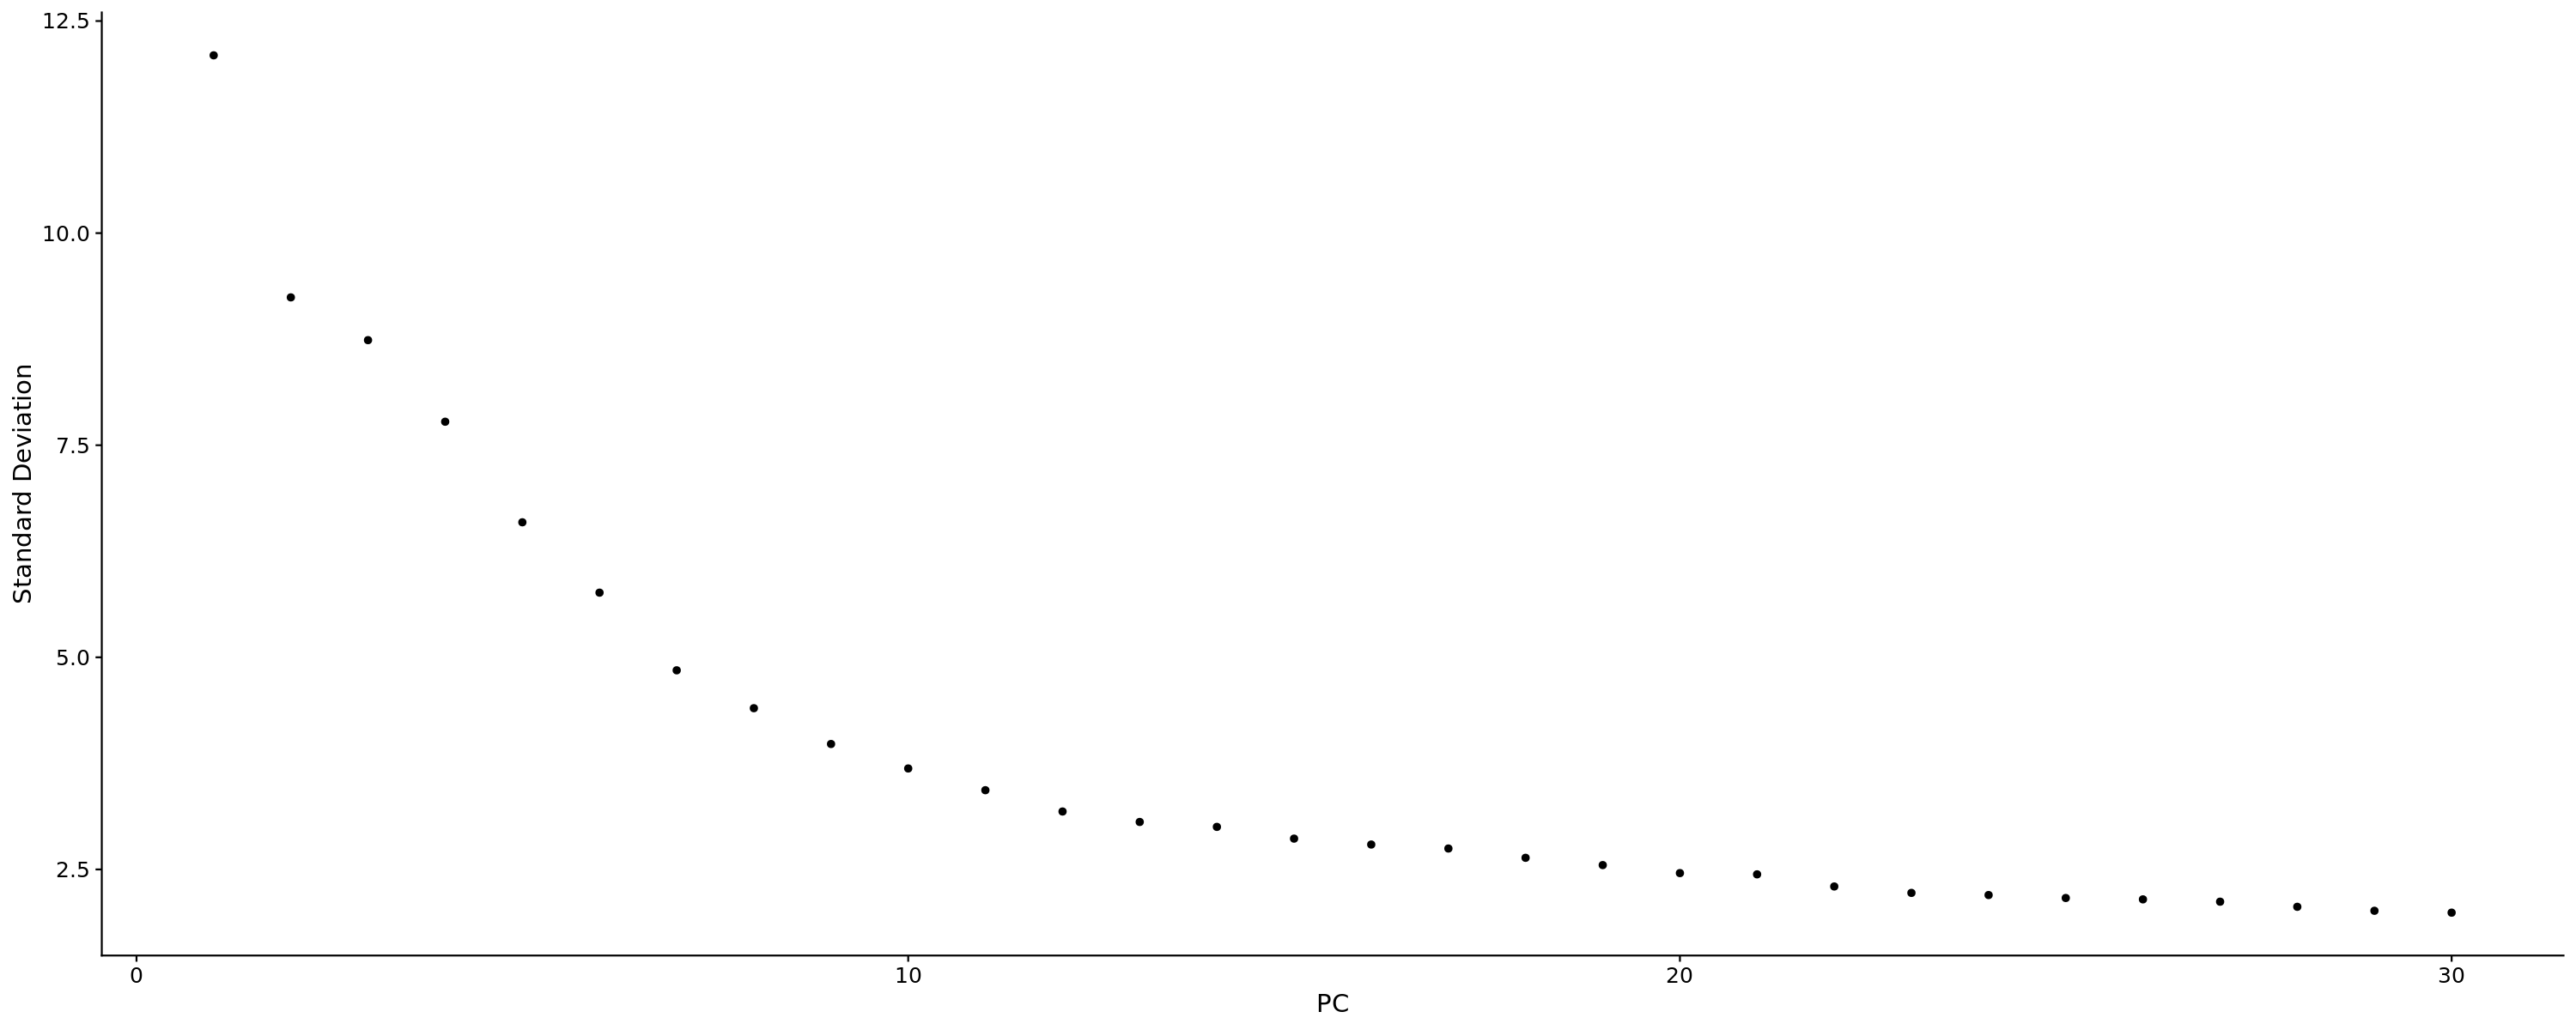

In [157]:
ElbowPlot(
 so_VP_mk_LT.combined,
  ndims = 30)

In [158]:
so_VP_mk_LT.combined <- RunUMAP(so_VP_mk_LT.combined, reduction = "pca", dims = 1:12)
so_VP_mk_LT.combined <- FindNeighbors(so_VP_mk_LT.combined, reduction = "pca", dims = 1:12)
so_VP_mk_LT.combined <- FindClusters(so_VP_mk_LT.combined, resolution = 0.5)

12:02:34 UMAP embedding parameters a = 0.9922 b = 1.112

12:02:34 Read 8294 rows and found 12 numeric columns

12:02:34 Using Annoy for neighbor search, n_neighbors = 30

12:02:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:02:35 Writing NN index file to temp file /tmp/RtmpEg3xsF/file203d4ab67d97

12:02:35 Searching Annoy index using 1 thread, search_k = 3000

12:02:37 Annoy recall = 100%

12:02:39 Commencing smooth kNN distance calibration using 1 thread

12:02:41 Initializing from normalized Laplacian + noise

12:02:41 Commencing optimization for 500 epochs, with 331128 positive edges

12:03:07 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8294
Number of edges: 270911

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 19
Elapsed time: 0 seconds


In [159]:
so_VP_mk_LT.combined

An object of class Seurat 
79133 features across 8294 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [160]:
head(so_VP_mk_LT.combined@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ERCC,Day,cell_name,Experiment,Cell.type,finalClusters,RNA_snn_res.0.5,seurat_clusters,integrated_snn_res.0.5
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>
AAAGAACCAACAGAGC.1,Tyser_VP_Messmer_Petropoulos_Zhou,50804,7902,0,0.01181009,primed_1,AAAGAACCAACAGAGC.1,VP,primed_VP_VP,primed_1,14,6,6
AAAGAACGTAGCCCTG.1,Tyser_VP_Messmer_Petropoulos_Zhou,55443,7953,0,0.03066212,primed_1,AAAGAACGTAGCCCTG.1,VP,primed_VP_VP,primed_1,14,6,6
AAAGGATAGCTCGAAG.1,Tyser_VP_Messmer_Petropoulos_Zhou,35159,6107,0,0.02844222,TSC_VP,AAAGGATAGCTCGAAG.1,VP,TSC_VP,TSC_VP,22,10,10
AAAGGATCACAAATGA.1,Tyser_VP_Messmer_Petropoulos_Zhou,23777,6107,0,0.01682298,primed_1,AAAGGATCACAAATGA.1,VP,primed_VP_VP,primed_1,14,6,6
AAAGGTATCGGAACTT.1,Tyser_VP_Messmer_Petropoulos_Zhou,15220,3848,0,0.01971091,undefined_VP,AAAGGTATCGGAACTT.1,VP,undefined_VP,undefined_VP,22,2,2
AAAGTCCAGAGAGAAC.1,Tyser_VP_Messmer_Petropoulos_Zhou,46068,7552,0,0.01953634,primed_1,AAAGTCCAGAGAGAAC.1,VP,primed_VP_VP,primed_1,14,6,6


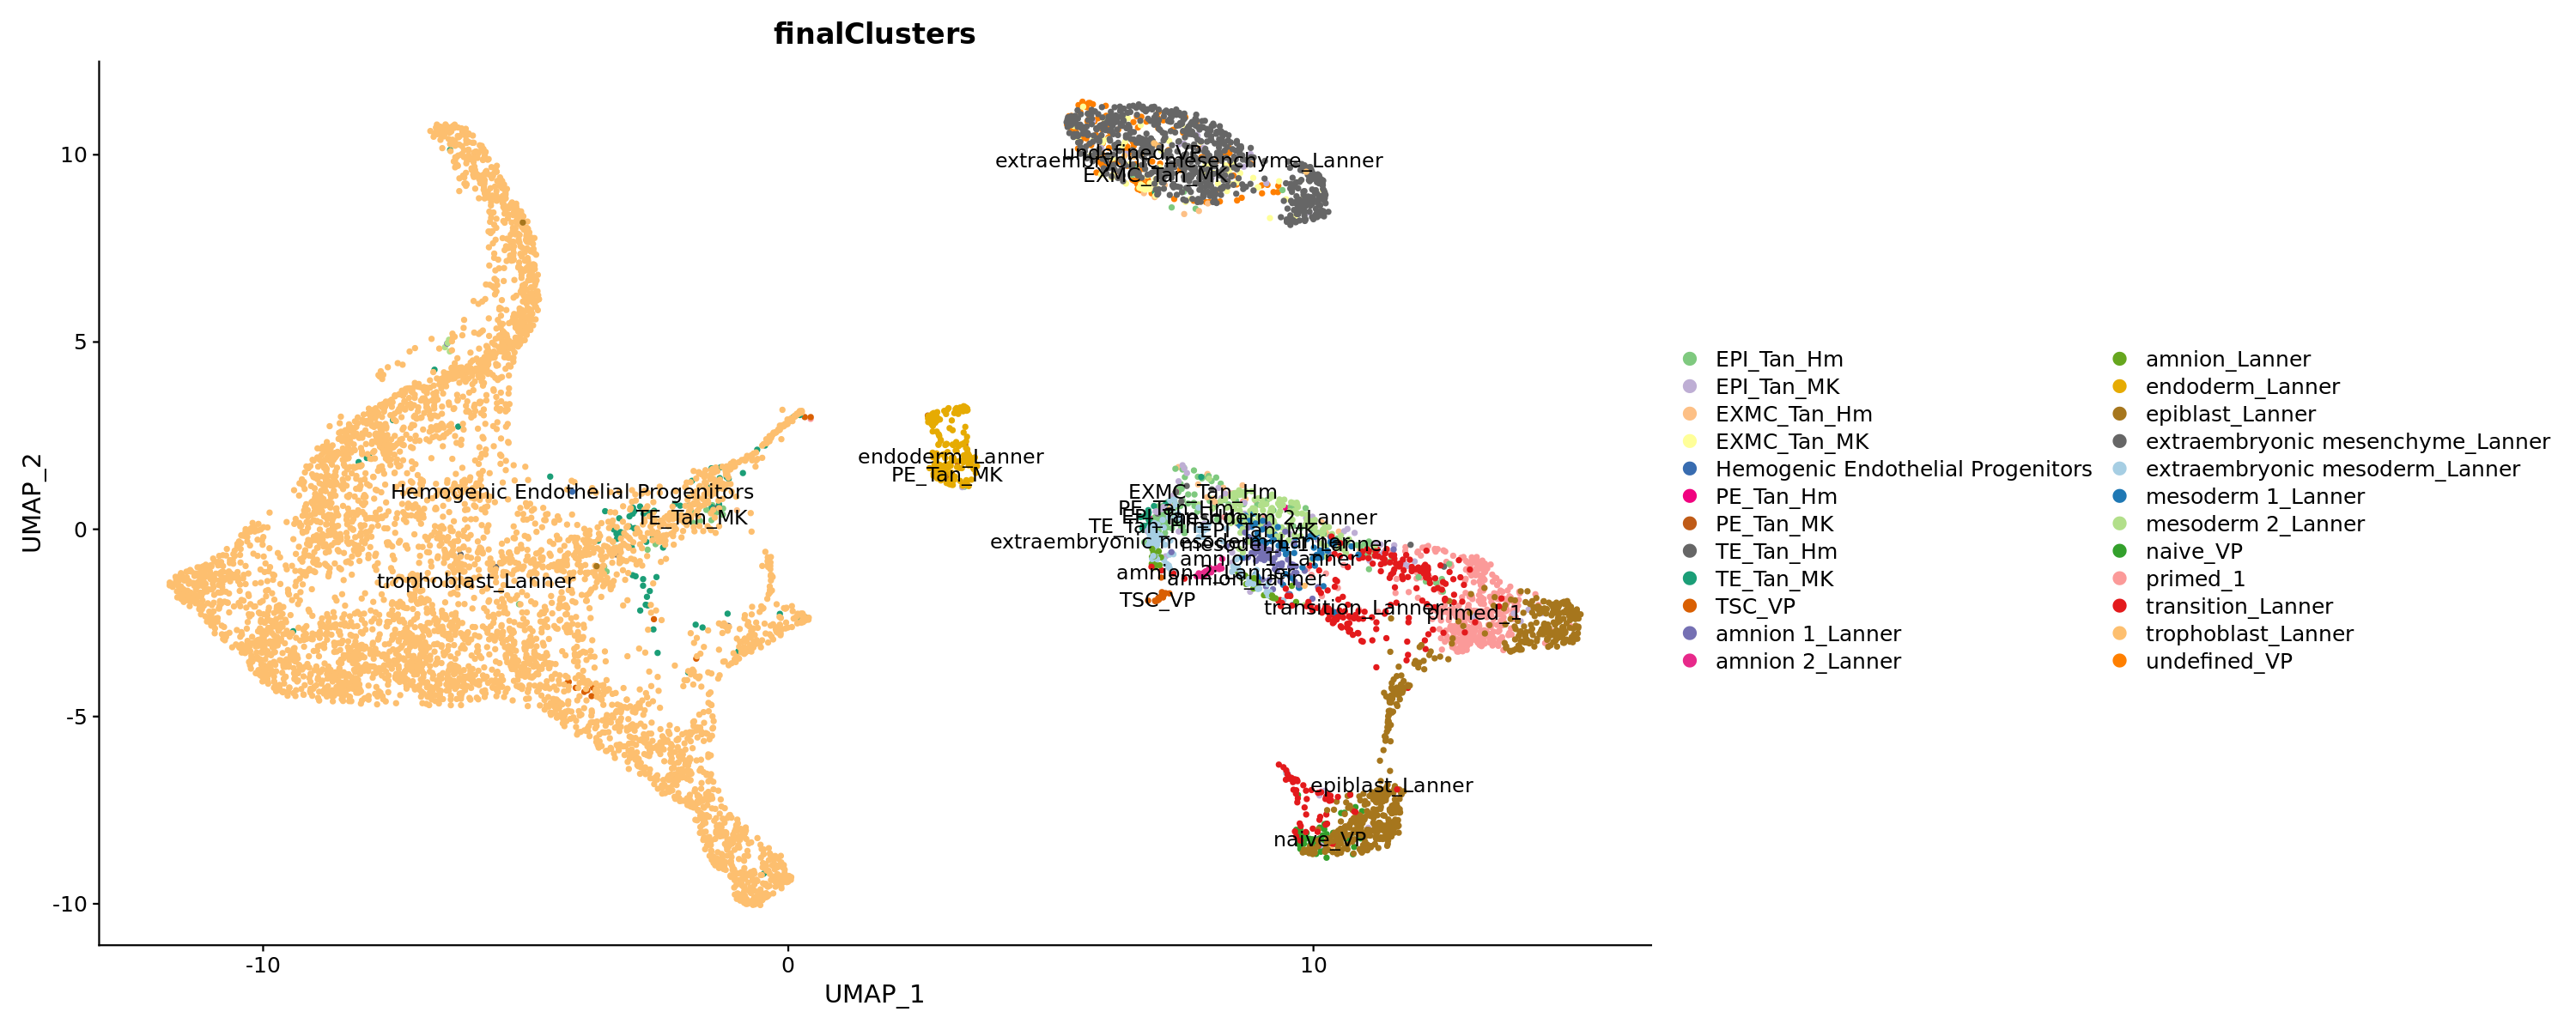

In [161]:
# Visualization
options(repr.plot.width=20, repr.plot.height=8)
p<-DimPlot(so_VP_mk_LT.combined, reduction = "umap", group.by = "finalClusters", label = T, pt.size=1, cols= col_vector, cols = )
p

In [263]:
table(so_VP_mk_LT.combined$finalClusters)


                       EPI_Tan_Hm                        EPI_Tan_MK 
                              157                                92 
                      EXMC_Tan_Hm                       EXMC_Tan_MK 
                               28                                68 
Hemogenic Endothelial Progenitors                         PE_Tan_Hm 
                                1                                 3 
                        PE_Tan_MK                         TE_Tan_Hm 
                                9                                11 
                        TE_Tan_MK                            TSC_VP 
                              103                                31 
                  amnion 1_Lanner                   amnion 2_Lanner 
                               71                                25 
                    amnion_Lanner                   endoderm_Lanner 
                               33                               182 
                  epiblast_Lanner

In [15]:
Idents(so_VP_mk_LT.combined)<- so_VP_mk_LT.combined$finalClusters

In [163]:
so_VP_mk_LT.combined <- RenameIdents(object = so_VP_mk_LT.combined, "amnion 1_Lanner" = "amnion_Lanner", "amnion 2_Lanner" = "amnion_Lanner", "mesoderm 1_Lanner" = "mesoderm_Lanner","mesoderm 2_Lanner" = "mesoderm_Lanner")

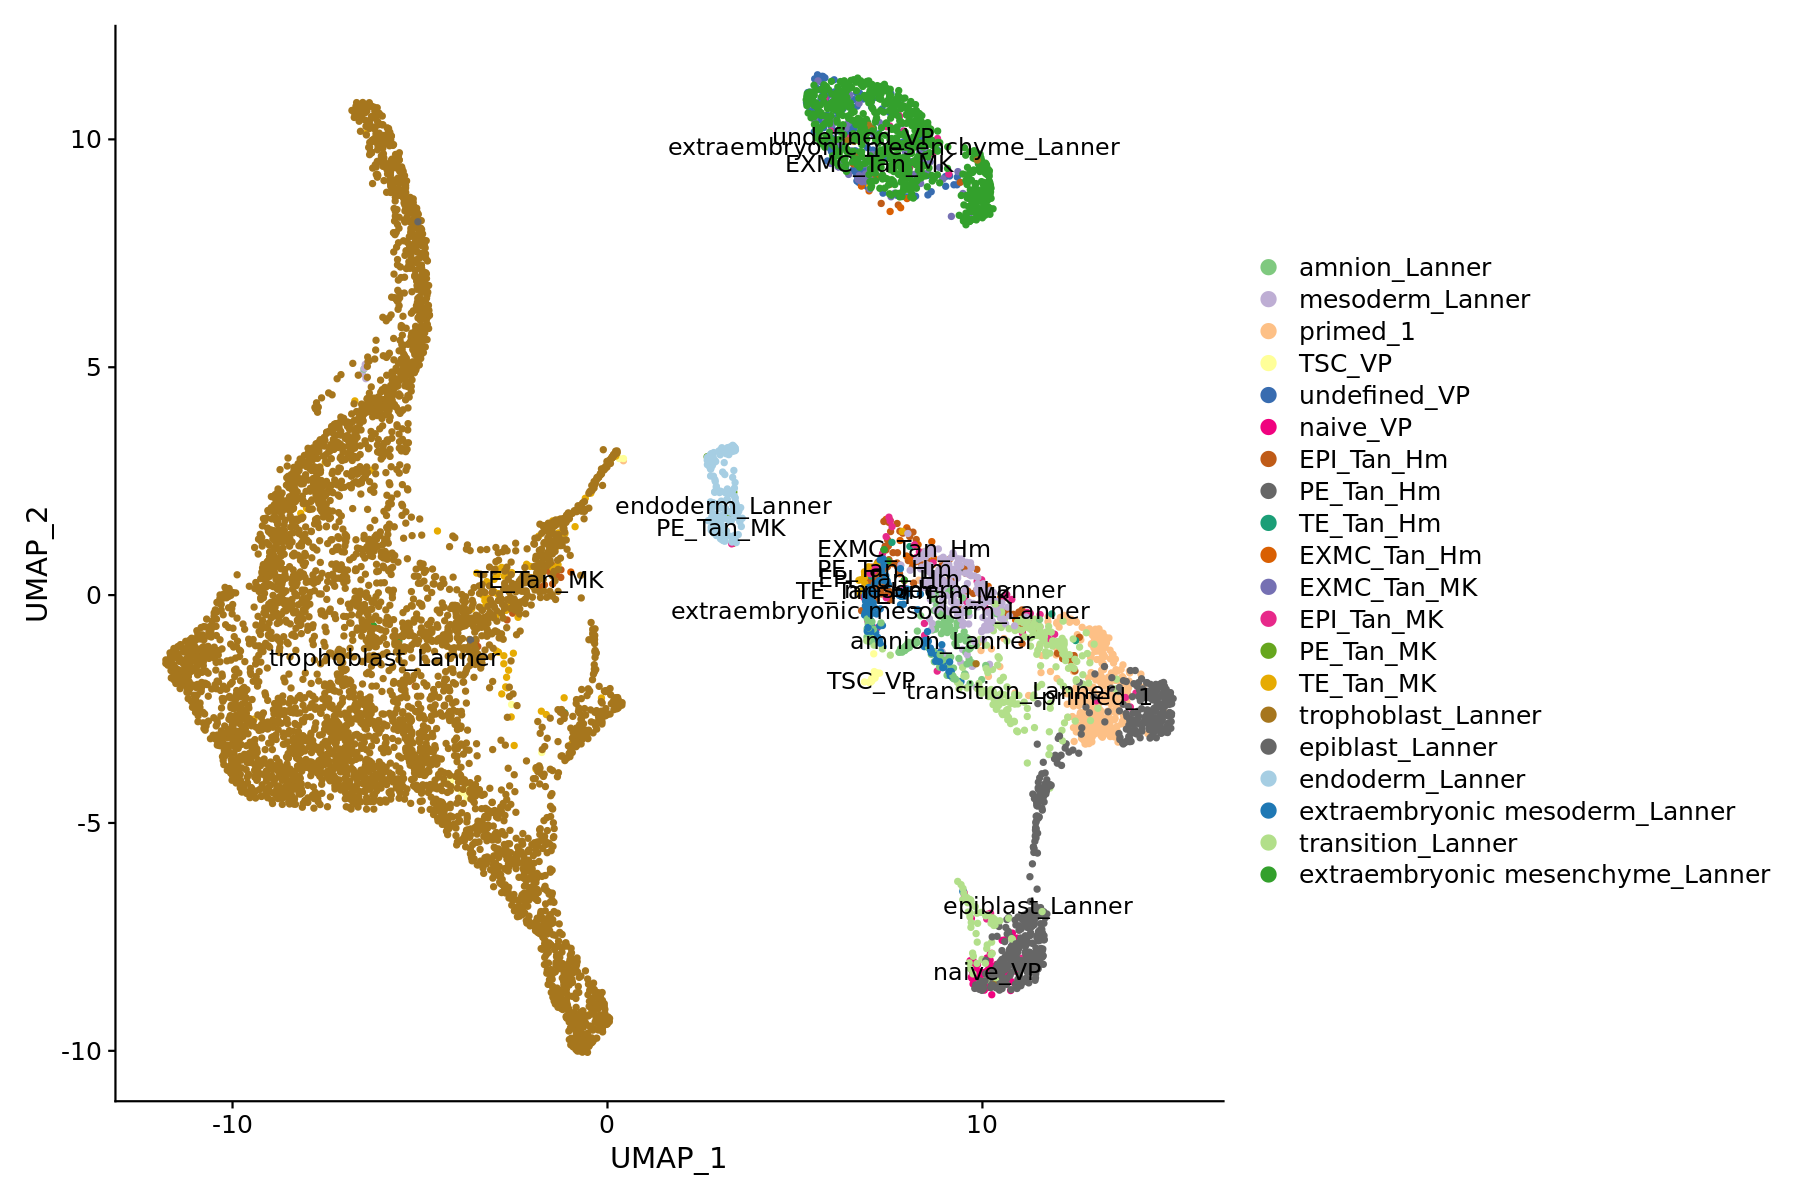

In [165]:
# Visualization
options(repr.plot.width=12, repr.plot.height=8)
p<-DimPlot(so_VP_mk_LT.combined, reduction = "umap", label = T, pt.size=1, cols= col_vector)
p

In [38]:
pdf("Figures/Fig1H_UMAP_monkey_LT_VP_.pdf", width = 12, height = 8)
plot(p)
dev.off()

png 
  2

In [39]:
Idents(so_VP_mk_LT.combined) <- "finalClusters"

In [40]:
Yang_EXMCme<- WhichCells(so_VP_mk_LT.combined, idents = c("extraembryonic mesenchyme_Lanner"))
#Yang_EXMC<- WhichCells(so_VP_mk_LT.combined, idents = c("extraembryonic mesoderm_Lanner"))
Tan_mk_EXMC<- WhichCells(so_VP_mk_LT.combined, idents = c("EXMC_Tan_MK"))
Tan_hm_EXMC<- WhichCells(so_VP_mk_LT.combined, idents = c("EXMC_Tan_Hm"))
PP_EMCs<- WhichCells(so_VP_mk_LT.combined, idents = c("Pham, Panda EXMC"))

In [26]:
list(ExMesoderm)

[[1]]
 [1] "SS.sc7785398" "SS.sc7785580" "SS.sc7785425" "SS.sc7785598" "SS.sc7785430"
 [6] "SS.sc7785569" "SS.sc7785327" "SS.sc7785511" "SS.sc7785399" "SS.sc7785414"
[11] "SS.sc7785339" "SS.sc7785562" "SS.sc7785529" "SS.sc7785596" "SS.sc7786742"
[16] "SS.sc7785634" "SS.sc7785597" "SS.sc7785621" "SS.sc7785543" "SS.sc7785363"
[21] "SS.sc7786686" "SS.sc7786506" "SS.sc7785662" "SS.sc7785527" "SS.sc7785623"
[26] "SS.sc7785507" "SS.sc7785520" "SS.sc7785401" "SS.sc7785422" "SS.sc7785494"
[31] "SS.sc7785386" "SS.sc7785353" "SS.sc7786712" "SS.sc7785381" "SS.sc7785403"
[36] "SS.sc7785542" "SS.sc7786519" "SS.sc7786513" "SS.sc7785648" "SS.sc7785447"
[41] "SS.sc7785622" "SS.sc7786672" "SS.sc7785279" "SS.sc7785568" "SS.sc7785548"
[46] "SS.sc7785333" "SS.sc7785283" "SS.sc7785616" "SS.sc7785480" "SS.sc7785304"
[51] "SS.sc7786515" "SS.sc7785903" "SS.sc7785637" "SS.sc7785289" "SS.sc7785432"
[56] "SS.sc7786156" "SS.sc7786641" "SS.sc7785313" "SS.sc7785380" "SS.sc7785583"
[61] "SS.sc7786490" "SS.sc7785625" "SS.sc7786039" "SS.sc7786575" "SS.sc7785456"
[66] "SS.sc7786643" "SS.sc7785624" "SS.sc7786549" "SS.sc7785450" "SS.sc7785495"
[71] "SS.sc7785549" "SS.sc7785639" "SS.sc7786520" "SS.sc7785504" "SS.sc7785311"
[76] "SS.sc7786824" "SS.sc7785496" "SS.sc7785330" "SS.sc7786547" "SS.sc7785404"
[81] "SS.sc7785280" "SS.sc7785431" "SS.sc7785571"

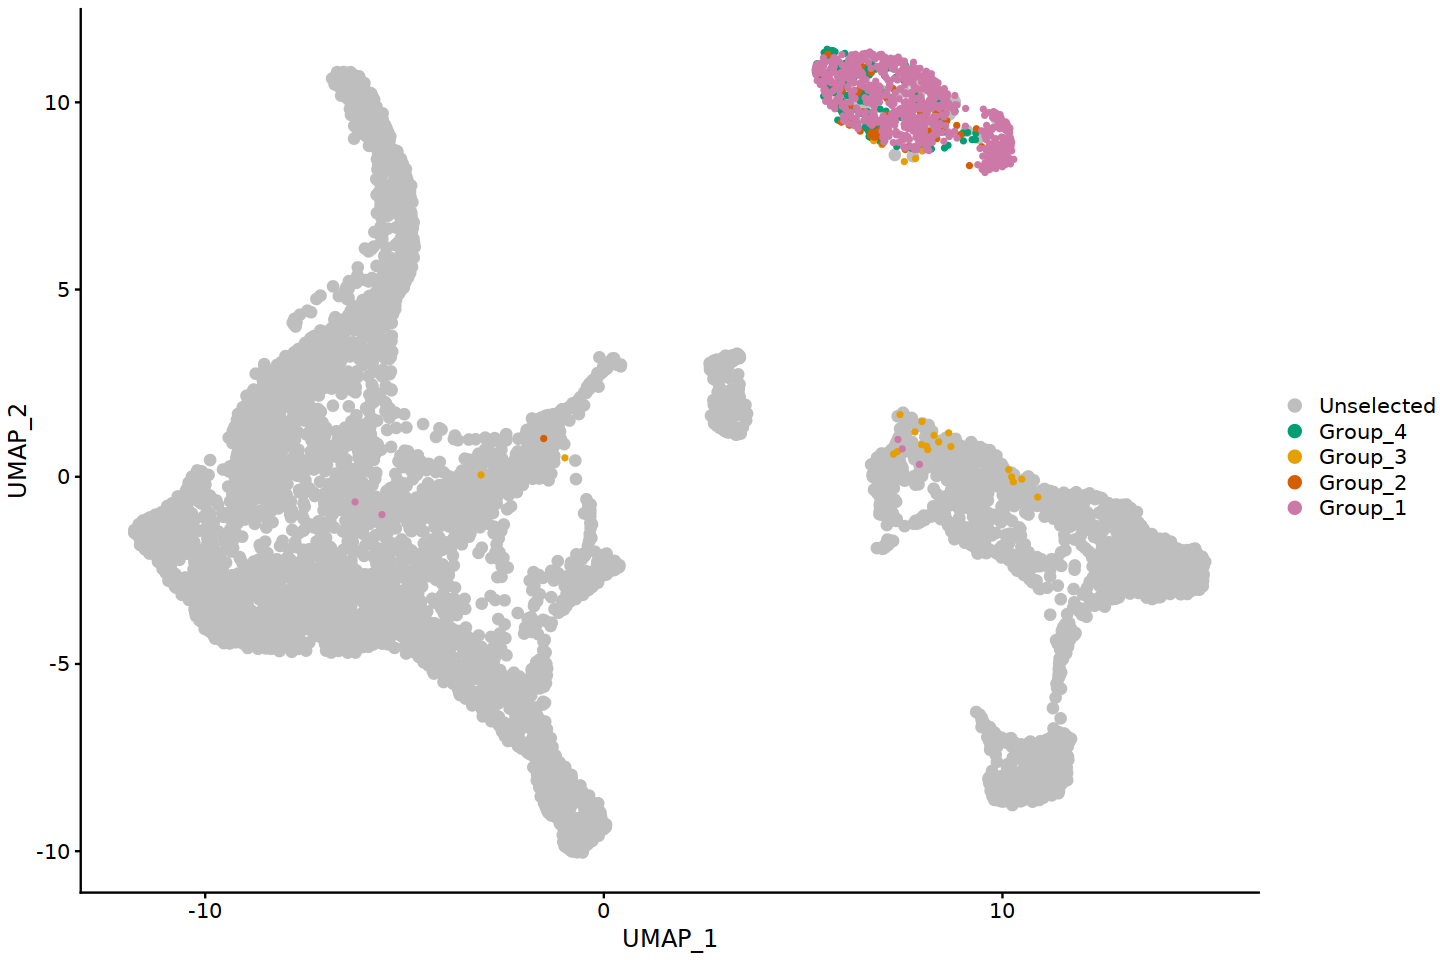

In [41]:
Plot1<- DimPlot(so_VP_mk_LT.combined,
                reduction = "umap",cells.highlight= list(Yang_EXMCme,Tan_mk_EXMC,  Tan_hm_EXMC , PP_EMCs),
                cols.highlight = c("#009E73", "#E69F00", "#D55E00", "#CC79A7","#0072B2" ) , pt.size =2.5, label.size = 3, cols= "grey")
                                   
Plot1

In [42]:
pdf("Figures/Fig1I_UMAP_monkey_LT_VP_EXMC.pdf", width = 12, height = 8)
plot(p)
dev.off()

png 
  2

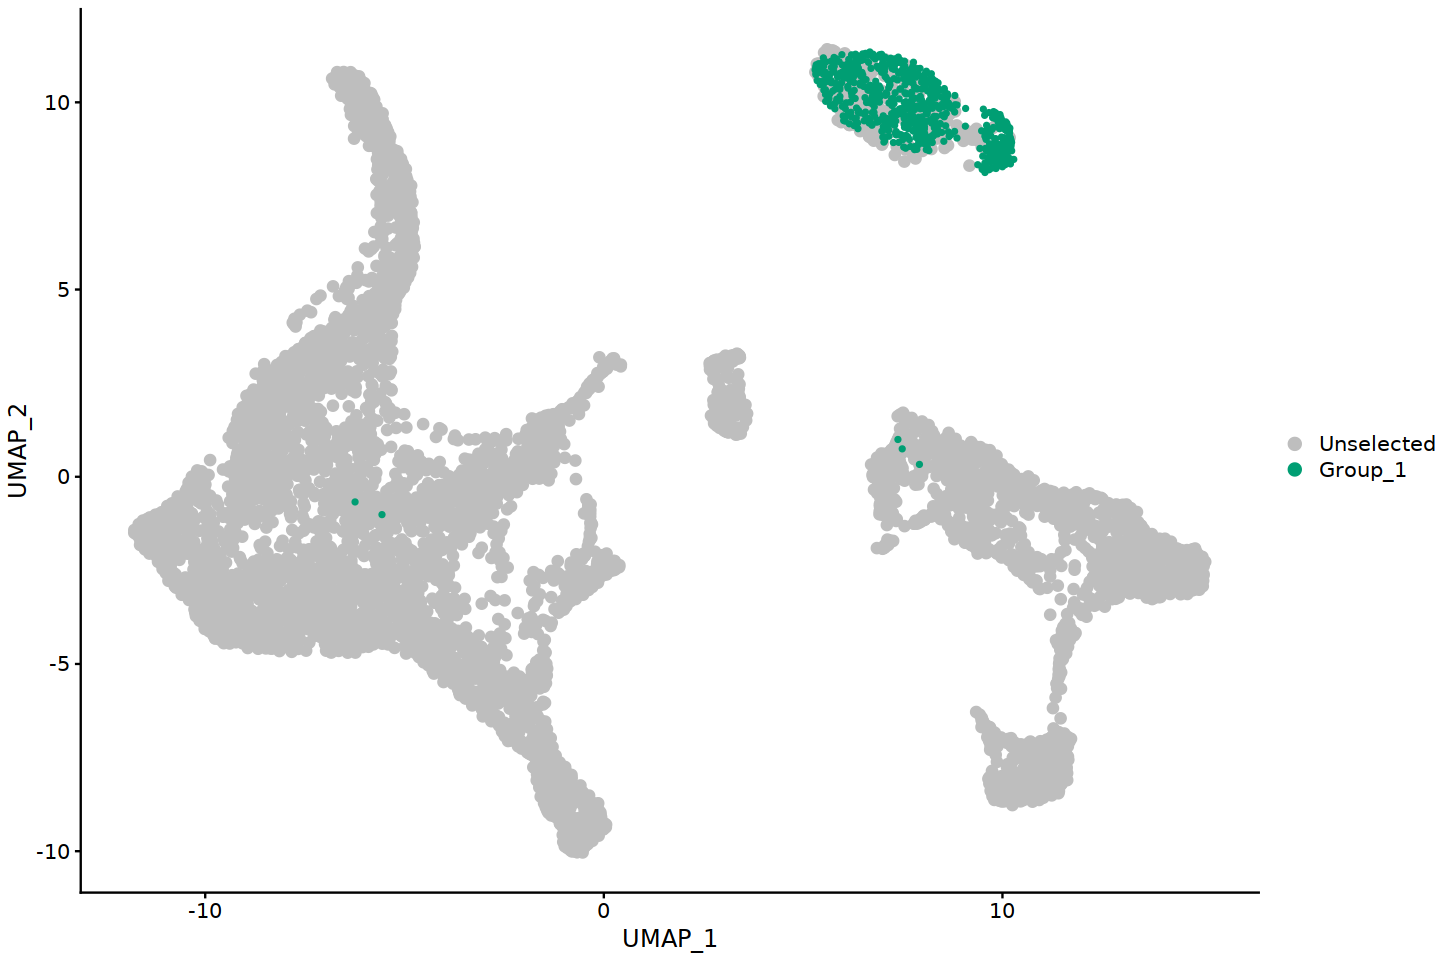

In [43]:
Plot1<- DimPlot(so_VP_mk_LT.combined,
                reduction = "umap",cells.highlight= list(Yang_EXMCme),
                cols.highlight = c("#009E73" ) , pt.size =2.5, label.size = 3, cols= "grey")
                                   
Plot1

In [44]:
pdf("Figures/Fig1I_UMAP_monkey_LT_VP_EXMCme.pdf", width = 8, height = 8)
plot(Plot1)
dev.off()

png 
  2

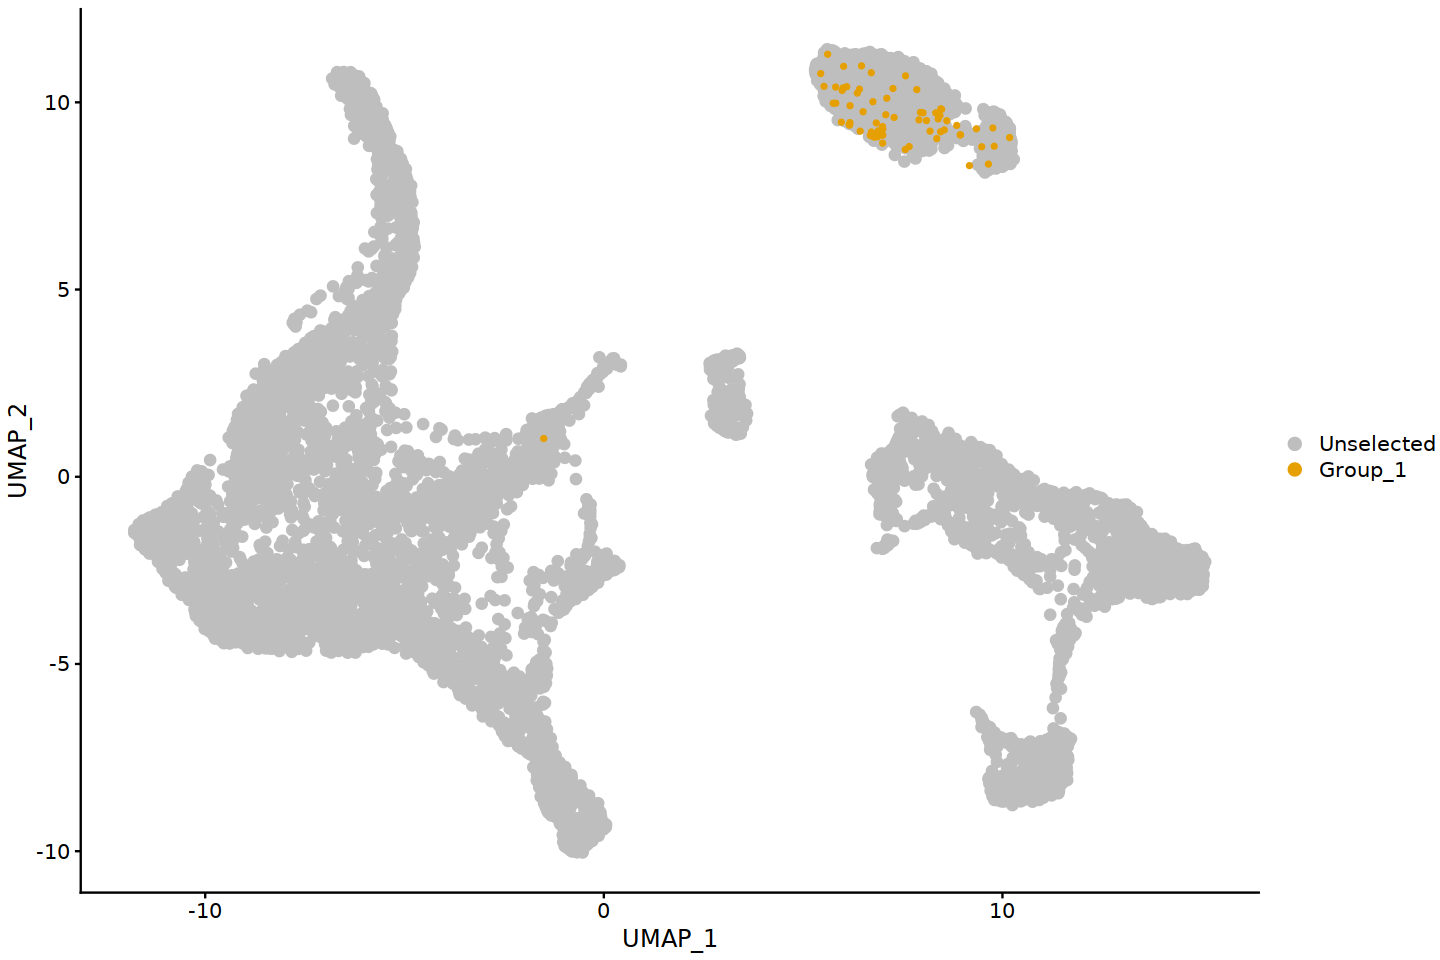

In [45]:
Plot1<- DimPlot(so_VP_mk_LT.combined,
                reduction = "umap",cells.highlight= list(Tan_mk_EXMC),
                cols.highlight = c( "#E69F00" ) , pt.size =2.5, label.size = 3, cols= "grey")
                                   
Plot1

In [46]:
pdf("Figures/Fig1I_UMAP_monkey_LT_VP_TanmkEXMC.pdf", width = 8, height = 8)
plot(Plot1)
dev.off()

png 
  2

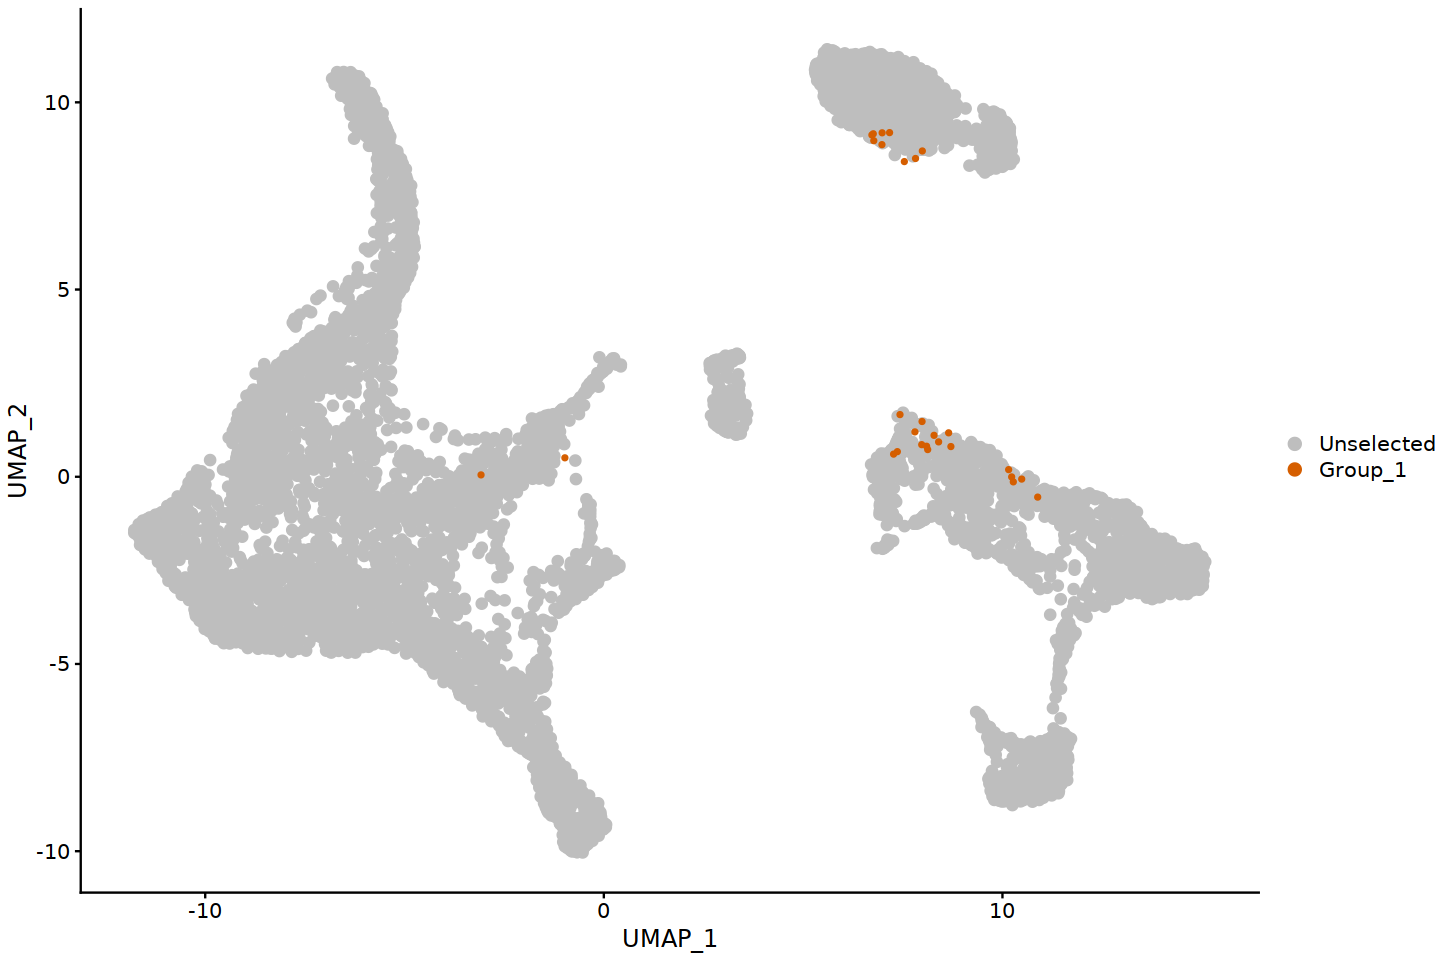

In [47]:
Plot1<- DimPlot(so_VP_mk_LT.combined,
                reduction = "umap",cells.highlight= list( Tan_hm_EXMC ),
                cols.highlight = c( "#D55E00" ) , pt.size =2.5, label.size = 3, cols= "grey")
                                   
Plot1

In [48]:
pdf("Figures/Fig1I_UMAP_monkey_LT_VP_Tan_hm_EXMC.pdf", width = 8, height = 8)
plot(Plot1)
dev.off()

png 
  2

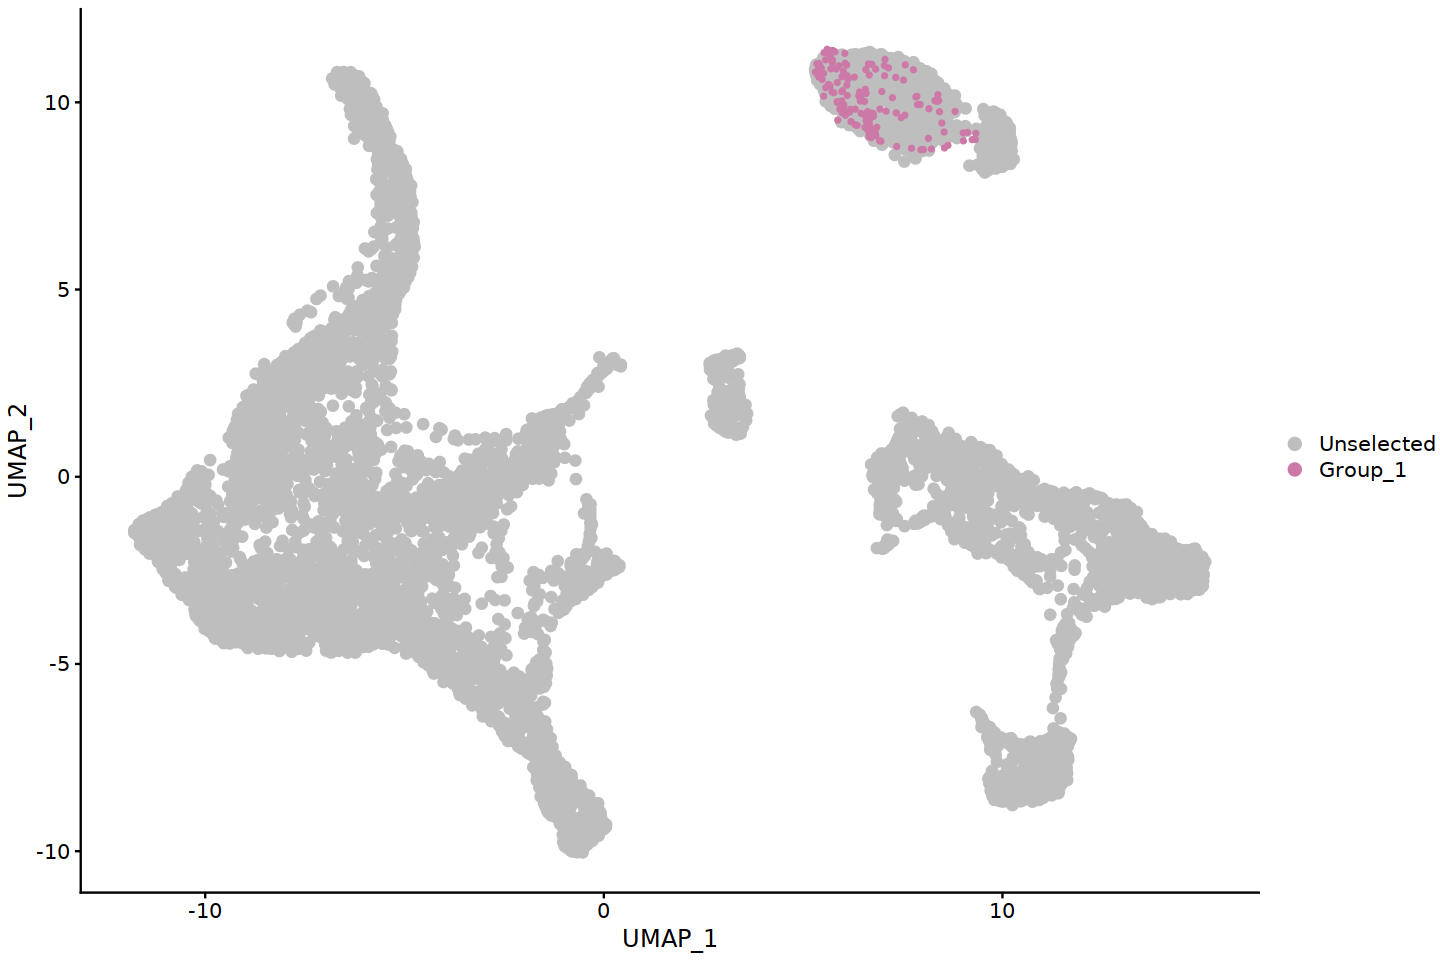

In [50]:
Plot1<- DimPlot(so_VP_mk_LT.combined,
                reduction = "umap",cells.highlight= list(PP_EMCs),
                cols.highlight = c( "#CC79A7" ) , pt.size =2.5, label.size = 3, cols= "grey")
                                   
Plot1

In [51]:
pdf("Figures/Fig1I_UMAP_monkey_LT_VP_PPEXMC.pdf", width = 8, height = 8)
plot(Plot1)
dev.off()

png 
  2

In [52]:
saveRDS(so_VP_mk_LT.combined,file= "Monkey_Lanner_Tan_VPd30.rds")